In [1]:
# Import required modules
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import re
import pprint
import glob
import pickle
import traceback
import logging
import os.path, time
from datetime import datetime, timedelta

# CSV files we have got so far

In [2]:
import os
for index,i in enumerate(sorted(os.listdir("csv/"))):
    print(index,i)

0 Business & entrepreneur.csv
1 Business & entrepreneurAuthors.csv
2 Commercial events.csv
3 Commercial eventsAuthors.csv
4 Complaints corner.csv
5 Complaints cornerAuthors.csv
6 Concerts.csv
7 ConcertsAuthors.csv
8 Daily life.csv
9 Daily lifeAuthors.csv
10 Education.csv
11 EducationAuthors.csv
12 Employment.csv
13 EmploymentAuthors.csv
14 Entertainment & dining.csv
15 Entertainment & diningAuthors.csv
16 Family mattershealth.csv
17 Family mattershealthAuthors.csv
18 Financebankingtaxation.csv
19 FinancebankingtaxationAuthors.csv
20 Food and drink.csv
21 Food and drinkAuthors.csv
22 Insurance.csv
23 InsuranceAuthors.csv
24 Introductions.csv
25 IntroductionsAuthors.csv
26 Language corner.csv
27 Language cornerAuthors.csv
28 Leaving Switzerland.csv
29 Leaving SwitzerlandAuthors.csv
30 Othergeneral.csv
31 OthergeneralAuthors.csv


# Load all data at once

Loading thread text:

In [3]:
dfContainer={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if not os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    dfContainer[re.sub(r'.csv','',os.path.basename(filename))]=df

# sorted(dataframes)
# dataFrames = pd.Series(dataFrames)
# df=pd.read_csv('Concerts',sep='\t',index_col=0)
# df

# dfContainer


In [4]:
dfAuthors={}
filenames = [fn for fn in glob.glob("csv/*.csv") 
         if os.path.basename(fn).endswith('Authors.csv')]
for index,filename in enumerate(filenames):
    df = pd.read_csv(filename, header=0,sep='\t',index_col=0)
    df = df[['topic','thread','user','views','replies','location','date','post','user_posts','since','exp','thanked','groaned','reputation']]
    dfAuthors[re.sub(r'.csv','',os.path.basename(filename))]=df
print(filenames,dfAuthors.keys())

dfAuthors['Business & entrepreneurAuthors'].head()
# dfAuthors['Business & entrepreneurAuthors'][['thread','user','date','post','user_posts','since','exp','thanked','groaned','reputation']]

['csv/ConcertsAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Business & entrepreneurAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/EducationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/Language cornerAuthors.csv'] dict_keys(['Commercial eventsAuthors', 'EducationAuthors', 'IntroductionsAuthors', 'OthergeneralAuthors', 'ConcertsAuthors', 'Daily lifeAuthors', 'Complaints cornerAuthors', 'FinancebankingtaxationAuthors', 'Leaving SwitzerlandAuthors', 'Business & entrepreneurAuthors', 'InsuranceAuthors', 'Language cornerAuthors', 'Family mattershealthAuthors', 'Food and drinkAuthors', 'EmploymentAuthors', 'Entertainment & diningAuthors'])


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,"""mark","17,624",0,"Location: Zollikon, Switzerland","11.08.2006, 15:44",\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,"Posts: 3,070",Join Date: May 2005,The Architect,Groaned at 3 Times in 3 Posts,Thanked 418 Times in 115 Posts,a reputation beyond repute
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,"""Nano",139,2,Location: Solothurn,"Yesterday, 23:08",\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,Posts: 2,Join Date: Jan 2017,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,no particular reputation at present
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,"""Richard","60,525",319,Location: Luzern currently,"13.07.2007, 12:23",I can imagine they would try and avoid doi...,"Posts: 2,565",Join Date: May 2005,Forum Legend,Groaned at 4 Times in 4 Posts,Thanked 720 Times in 373 Posts,a reputation beyond repute
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],"""vulcan29","3,647",26,Location: uk,"30.08.2014, 01:13","\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",Posts: 12,Join Date: Aug 2014,Newbie 1st class,Groaned at 0 Times in 0 Posts,Thanked 1 Time in 1 Post,no particular reputation at present
4,Business & entrepreneur,importing goods,"""swissv",225,2,Location: Zurich,"02.01.2017, 14:43",\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,Posts: 5,Join Date: Dec 2016,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,no particular reputation at present


In [5]:
# print(dfAuthors['Complaints cornerAuthors'].loc[dfAuthors['Complaints cornerAuthors']['since']=='Location: Lugano']['since'].index)
# # dfAuthors['Complaints cornerAuthors']=dfAuthors['Complaints cornerAuthors'].set_value( 'since',1642, 'null')
# wrongdata=set()
wrongdata=set()
[[wrongdata.add(key) for since in dfAuthors[key]['since'] if since=='Location: Lugano']for key in dfAuthors]
wrongdata

dfAuthors['Food and drinkAuthors'][dfAuthors['Food and drinkAuthors']['since']=='Location: Lugano']
# dfAuthors['Complaints cornerAuthors'][dfAuthors['Complaints cornerAuthors']['since']=='Location: Lugano']

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
3363,Food and drink,Ticino grocery shopping- do you do it in Switz...,Jasmine28,"4,814",24,Posts: 59,"16.04.2010, 16:08","Irony, I think I'd call it. Ready meals (...",Groaned at 14 Times in 7 Posts,Location: Lugano,Join Date: Dec 2009,Thanked 71 Times in 22 Posts,Hi,considered knowledgeable


In [6]:
for key in wrongdata:
#     dfAuthors[key]['since']=dfAuthors[key]['since'][dfAuthors[key].since.replace('Location: Lugano' , 'null')]
    ids=dfAuthors[key][dfAuthors[key]['since']=='Location: Lugano'].index
    dfAuthors[key]=dfAuthors[key].loc[dfAuthors[key].index ^ ids].reset_index()
    dfAuthors[key].drop('index',axis=1,inplace=True)
dfAuthors['Complaints cornerAuthors']
# dfAuthors['Complaints cornerAuthors']=dfAuthors['Complaints cornerAuthors'][dfAuthors['Complaints cornerAuthors'].index!= ids]
# dfAuthors['Complaints cornerAuthors'].loc[1641:1645]

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Complaints corner,Ricardo-wrong product delivered,"""",969,47,Location: Zürich,"05.01.2017, 16:40",Actually it sounds more like opinions on a...,"Posts: 3,727",Join Date: Oct 2007,Forum Legend,Groaned at 385 Times in 202 Posts,"Thanked 1,178 Times in 756 Posts",m
1,Complaints corner,the great Swisscom cock pit bilk,"""armed_neutrality",267,8,Location: Vaud,"Today, 14:59",English is not your native language then?\...,Posts: 114,Join Date: May 2014,Member,Groaned at 7 Times in 2 Posts,Thanked 101 Times in 52 Posts,considered knowledgeable
2,Complaints corner,How to deal with difficult co-worker,"""Karl","5,773",102,Location: Here,"30.12.2016, 06:14",\r\n\t\t\t\r\n\t\t\tblimey people are making ...,"Posts: 1,723",Join Date: Sep 2008,Forum Veteran,Groaned at 173 Times in 77 Posts,"Thanked 2,512 Times in 812 Posts",a reputation beyond repute
3,Complaints corner,**Warning ** Inter Discount** Warning**,"""KarlN","32,366",189,Location: Zurich,"11.06.2009, 19:05",\r\n\t\t\t\r\n\t\t\tI wouldn't buy expensive ...,"Posts: 1,258",Join Date: Aug 2008,Forum Veteran,Groaned at 11 Times in 10 Posts,Thanked 301 Times in 183 Posts,a reputation beyond repute
4,Complaints corner,DHL are muppets,"""xynth",829,18,Location: Zurich,"04.01.2017, 20:23",Exactly.,Posts: 772,Join Date: Aug 2006,Forum Veteran,Groaned at 37 Times in 24 Posts,"Thanked 1,733 Times in 515 Posts",a reputation beyond repute
5,Complaints corner,Multiple racist incidents at Petra's Tip Top B...,"""makas","2,408",73,Location: Zurich,"05.01.2017, 16:52",Was it the Blue Oyster Bar?\r\n\t\t,Posts: 82,Join Date: Feb 2015,Junior Member,Groaned at 37 Times in 18 Posts,Thanked 29 Times in 19 Posts,considered unworthy
6,Complaints corner,Don't trust LATAM (the airline...),guest,"2,220",43,null,null,...from a check-in agent who possibly didn...,null,null,null,null,null,null
7,Complaints corner,Neighbours fighting very very loud,"""acmilan","3,830",66,Location: San Donato Milanese,"06.12.2016, 00:34",I'm happy it worked for you. But I like bo...,Posts: 378,Join Date: Aug 2008,Senior Member,Groaned at 15 Times in 10 Posts,Thanked 504 Times in 192 Posts,an excellent reputation
8,Complaints corner,The micro-RANT thread,"""Castro","35,757",320,Location: Basel-Land of Smiles,"27.04.2015, 12:04",\r\n\t\t\t\r\n\t\t\t. . . . . every day on th...,"Posts: 4,795",Join Date: Nov 2007,à la mod,Groaned at 94 Times in 75 Posts,"Thanked 12,822 Times in 4,181 Posts",a reputation beyond repute
9,Complaints corner,The Unscrupulous FUST in Geneva,"""tdanik","1,740",13,Location: Geneva,"01.12.2016, 12:25",\r\n\t\t\t\r\n\t\t\tDespite your lack of para...,Posts: 1,Join Date: Dec 2016,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,no particular reputation at present


Clean and transform data

In [7]:
# # Casting views from str to int (- to 0 because is a moved)
today=datetime.strptime(time.ctime(os.path.getctime('csv/ConcertsAuthors.csv')),'%a %b %d %H:%M:%S %Y')
yesterday=today- timedelta(days=1)
tdy="%d.%d.%d" %(today.day,today.month,today.year)
ystr="%d.%d.%d" %(yesterday.day,yesterday.month,yesterday.year)

for key in dfContainer:
    dfContainer[key]['views']=dfContainer[key]['views'].apply(lambda x: str(x).replace(',',''))
    dfContainer[key]['replies']=dfContainer[key]['replies'].apply(lambda x: str(x).replace(',',''))
print(filenames)
for key in dfAuthors:
#     dfAuthors[key].user_posts=dfAuthors[key].apply(lambda x: x[9].replace('Posts: ','').replace(',','').replace('-','0') ,axis=1)
#     [print(key) for x in dfAuthors[key]['since'] if 'Location: Lugano' in x]
    dfAuthors[key]['views']=dfAuthors[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')))
    dfAuthors[key]['replies']=dfAuthors[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0')))
    dfAuthors[key]['user_posts']=dfAuthors[key]['user_posts'].apply(lambda x: ''.join(re.findall(r'\d+',x)))
    dfAuthors[key]['user']=dfAuthors[key]['user'].apply(lambda x: str(x).replace(str(x)[0],'') if((str(x)[0])=='"') else str(x))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('null',("1.1.0001, 00:00")))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('Yesterday',ystr))
    dfAuthors[key]['date']=dfAuthors[key]['date'].apply(lambda x: x.replace('Today',tdy))
    dfAuthors[key]['date']=[datetime.strptime(x, '%d.%m.%Y, %H:%M')for x in dfAuthors[key]['date'] if (x!='null')]
    dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: x.replace('Join Date:',''))
    dfAuthors[key]['since']=dfAuthors[key]['since'].apply(lambda x: x.replace('null',(" Jun 0001")))
    dfAuthors[key]['since']=[datetime.strptime(x, ' %b %Y')for x in dfAuthors[key]['since']]
    dfAuthors[key]['location']=dfAuthors[key]['location'].apply(lambda x: x.replace('Location: ',''))

# print(filenames)


['csv/ConcertsAuthors.csv', 'csv/OthergeneralAuthors.csv', 'csv/Food and drinkAuthors.csv', 'csv/Business & entrepreneurAuthors.csv', 'csv/EmploymentAuthors.csv', 'csv/EducationAuthors.csv', 'csv/Family mattershealthAuthors.csv', 'csv/FinancebankingtaxationAuthors.csv', 'csv/IntroductionsAuthors.csv', 'csv/InsuranceAuthors.csv', 'csv/Daily lifeAuthors.csv', 'csv/Entertainment & diningAuthors.csv', 'csv/Complaints cornerAuthors.csv', 'csv/Commercial eventsAuthors.csv', 'csv/Leaving SwitzerlandAuthors.csv', 'csv/Language cornerAuthors.csv']


Reputation transformation. Basic transformation:

In [8]:
print('Reputation values: ',dfAuthors['Business & entrepreneurAuthors']['reputation'].unique())
d = {}
d["a reputation beyond repute"] = 6 # 
d["an excellent reputation"] = 5 # 
d["considered knowledgeable"] = 4 #
d["earned the respect of many"] = 3 #
d["earned some respect"] = 2#
d["made some interesting contributions"] = 1 #
d["no particular reputation at present"] = 0#1
d["slipped a little"] = -1 #0
d["become a little unpopular"] = -2 #
d["annoyed a few people around here"] = -3 #
d["considered a nuisance"] = -4 #
d["considered unworthy"] = -5 #
d["null"] = np.nan


# for key in dfAuthors:
# #     print(key)
#     for i in dfAuthors[key]['reputation'].unique():
#         uniques.add(i)
#     dfAuthors[key]['reputation']=dfAuthors[key]['reputation'].apply(lambda x: d[x] if(len(str(x))>3) else np.nan)
# # dfAuthors['EducationAuthors'].head()
# print('all rep values',uniques)


Reputation values:  ['a reputation beyond repute' 'no particular reputation at present'
 'become a little unpopular' 'earned some respect' 'slipped a little'
 'made some interesting contributions' 'considered knowledgeable'
 'earned the respect of many' 'null' 'annoyed a few people around here'
 'considered unworthy' 'an excellent reputation' 'considered a nuisance'
 nan 'u' 'a']


In [9]:
uniques=set()
[[uniques.add(user_exp) for user_exp in dfAuthors[key]['reputation'] if user_exp not in list(d.keys())]for key in dfAuthors]
uniques

{nan, 'h', 'u', 'm', 'a'}

In [10]:
# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['reputation']=[d.get(item,item)  for item in dfAuthors[key]['reputation']]
dfAuthors['Business & entrepreneurAuthors'].head()


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland",2006-08-11 15:44:00,\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,2005-05-01 00:00:00,The Architect,Groaned at 3 Times in 3 Posts,Thanked 418 Times in 115 Posts,6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,2017-01-11 23:08:00,\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,2017-01-01 00:00:00,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,2007-07-13 12:23:00,I can imagine they would try and avoid doi...,2565,2005-05-01 00:00:00,Forum Legend,Groaned at 4 Times in 4 Posts,Thanked 720 Times in 373 Posts,6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,2014-08-30 01:13:00,"\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,2014-08-01 00:00:00,Newbie 1st class,Groaned at 0 Times in 0 Posts,Thanked 1 Time in 1 Post,0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,2017-01-02 14:43:00,\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,2016-12-01 00:00:00,Newbie,Groaned at 0 Times in 0 Posts,Thanked 0 Times in 0 Posts,0


In [11]:
print('Reputation values: ',dfAuthors['EducationAuthors']['exp'].unique())
# Basic exp
d = {}
d["Newbie"] = 0 # 
d["Newbie 1st class"] = 1 #
d["Junior Member"] = 2 #
d["Member"] = 3#
d["Senior Member"] = 4 #
d["Forum Veteran"] = 5#1
d["Forum Legend"] = 6 #0
d["Commercial paid-placement ads"] = 7 # 
d["Banned"] = -1 #
d["null"] = np.nan #

Reputation values:  ['Commercial paid-placement ads' 'Forum Legend' 'null' 'Newbie'
 'Newbie 1st class' 'Banned' 'Forum Veteran' 'Member' 'Senior Member'
 'Junior Member' 'modified and reprogrammed']


There are some special rols:

In [12]:
other_rols=set()
[[other_rols.add(user_exp) for user_exp in dfAuthors[key]['exp'] if user_exp not in list(d.keys())]for key in dfAuthors]
other_rols

{'A singular modality',
 'Moddy McModface',
 'Moderately Amused',
 'Moderato espressivo',
 'Only in moderation',
 'RIP',
 'Scammer until he proves otherwise',
 'The Architect',
 'Unbridled Mod',
 'modified and reprogrammed',
 'à la mod'}

Because they aren't so many of them. We will parse them manually. 

In [12]:
# dfAuthors['EducationAuthors'].head()
d["A singular modality"] = 8 # Special rol
d["Moderately Amused"] = 8 # Special rol
d["Only in moderation"] = 8 # Special rol
d["The Architect"] = 8 # Special rol
d["Unbridled Mod"] = 8 # Special rol
d["à la mod"] = 8 #
d["RIP"] = 8 # Special rol
d["Moddy McModface"] = 8 # Special rol
d["Moderato espressivo"] = 8 # Special rol
d["modified and reprogrammed"] = 8 #

# temp=map(d.get, dfAuthors['EducationAuthors']['reputation'], dfAuthors['EducationAuthors']['reputation'])
for key in dfAuthors:
    dfAuthors[key]['exp']=[d.get(item,item)  for item in dfAuthors[key]['exp']]
# dfAuthors['Complaints cornerAuthors'][(dfAuthors['Complaints cornerAuthors']['exp']=='Join Date: Dec 2009')]
print('Exp values: ',dfAuthors['Complaints cornerAuthors']['exp'].unique())
print('Exp values: ',dfAuthors['Business & entrepreneurAuthors']['exp'].unique())


Exp values:  [  6.   3.   5.   2.  nan   4.   8.   0.   1.  -1.]
Exp values:  [  8.   0.   6.   1.   2.   4.   5.   3.  nan  -1.]


Thanked and groaned parse

In [13]:
# Thanked 418 Times in 115 
# Groaned at 3 Times in 3 Posts
for key in dfAuthors:
    dfAuthors[key]['groaned']=dfAuthors[key]['groaned'].apply(lambda x: re.findall(r'\d+',x))
    dfAuthors[key]['thanked']=dfAuthors[key]['thanked'].apply(lambda x: re.findall(r'\d+',x))
dfAuthors['Business & entrepreneurAuthors'].head()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland",2006-08-11 15:44:00,\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,2005-05-01 00:00:00,The Architect,"[3, 3]","[418, 115]",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,2017-01-11 23:08:00,\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,2017-01-01 00:00:00,Newbie,"[0, 0]","[0, 0]",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,2007-07-13 12:23:00,I can imagine they would try and avoid doi...,2565,2005-05-01 00:00:00,Forum Legend,"[4, 4]","[720, 373]",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,2014-08-30 01:13:00,"\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,2014-08-01 00:00:00,Newbie 1st class,"[0, 0]","[1, 1]",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,2017-01-02 14:43:00,\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,2016-12-01 00:00:00,Newbie,"[0, 0]","[0, 0]",0


In [14]:
dfAuthors['Business & entrepreneurAuthors'].head()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Business & entrepreneur,Posting in this area - guidelines - rules - re...,mark,17624,0,"Zollikon, Switzerland",2006-08-11 15:44:00,\r\n\t\t\t\r\n\t\t\tThis area is intended as ...,3070,2005-05-01 00:00:00,The Architect,"[3, 3]","[418, 115]",6
1,Business & entrepreneur,Questions about liability and invoicing of Fre...,Nano,139,2,Solothurn,2017-01-11 23:08:00,\r\n\t\t\t\r\n\t\t\tI work though my own GmbH...,2,2017-01-01 00:00:00,Newbie,"[0, 0]","[0, 0]",0
2,Business & entrepreneur,Help for Businesses/Freelancers in CH,Richard,60525,319,Luzern currently,2007-07-13 12:23:00,I can imagine they would try and avoid doi...,2565,2005-05-01 00:00:00,Forum Legend,"[4, 4]","[720, 373]",6
3,Business & entrepreneur,Becoming self-employed in Ticino [EU citizen],vulcan29,3647,26,uk,2014-08-30 01:13:00,"\r\n\t\t\t\r\n\t\t\tHi again, sorry for resur...",12,2014-08-01 00:00:00,Newbie 1st class,"[0, 0]","[1, 1]",0
4,Business & entrepreneur,importing goods,swissv,225,2,Zurich,2017-01-02 14:43:00,\r\n\t\t\t\r\n\t\t\tWhether you can or not de...,5,2016-12-01 00:00:00,Newbie,"[0, 0]","[0, 0]",0


# Plotting
We will first transform our string data to integers, so we can plot it. Then we will join al interesting data in a df and obtain general statistical information.

In [15]:
# Run it just ones.
for key in dfContainer:
    dfContainer[key]['views']=dfContainer[key]['views'].apply(lambda x: int(x.replace(',','').replace('-','0')))
    dfContainer[key]['replies']=dfContainer[key]['replies'].apply(lambda x: int(str(x).replace(',','').replace('-','0')))


In [18]:
moreViews=pd.DataFrame()
Views=pd.DataFrame()
viewsStats=pd.DataFrame()
repliesStats=pd.DataFrame()
for key in dfContainer:
#     dfContainer[key].views=dfContainer[key].apply(lambda x: int(x[4].replace(',','').replace('-','0')),axis=1)
    viewsStats[key]=dfContainer[key].describe()['views']
    repliesStats[key]=dfContainer[key].describe()['replies']
    temp=dfContainer[key][['threads','views']]
    temp2=temp.sort_values('views',ascending=0)[:4]['views']
    temp2.index=[np.arange(4)]
    Views[key]=temp2
    temp=temp.sort_values('views',ascending=0)[:4]
    temp['index2']=key
    temp.index=[temp.index2,temp.threads]
    temp=temp.drop(['index2','threads'],1)
    moreViews=moreViews.append(temp)


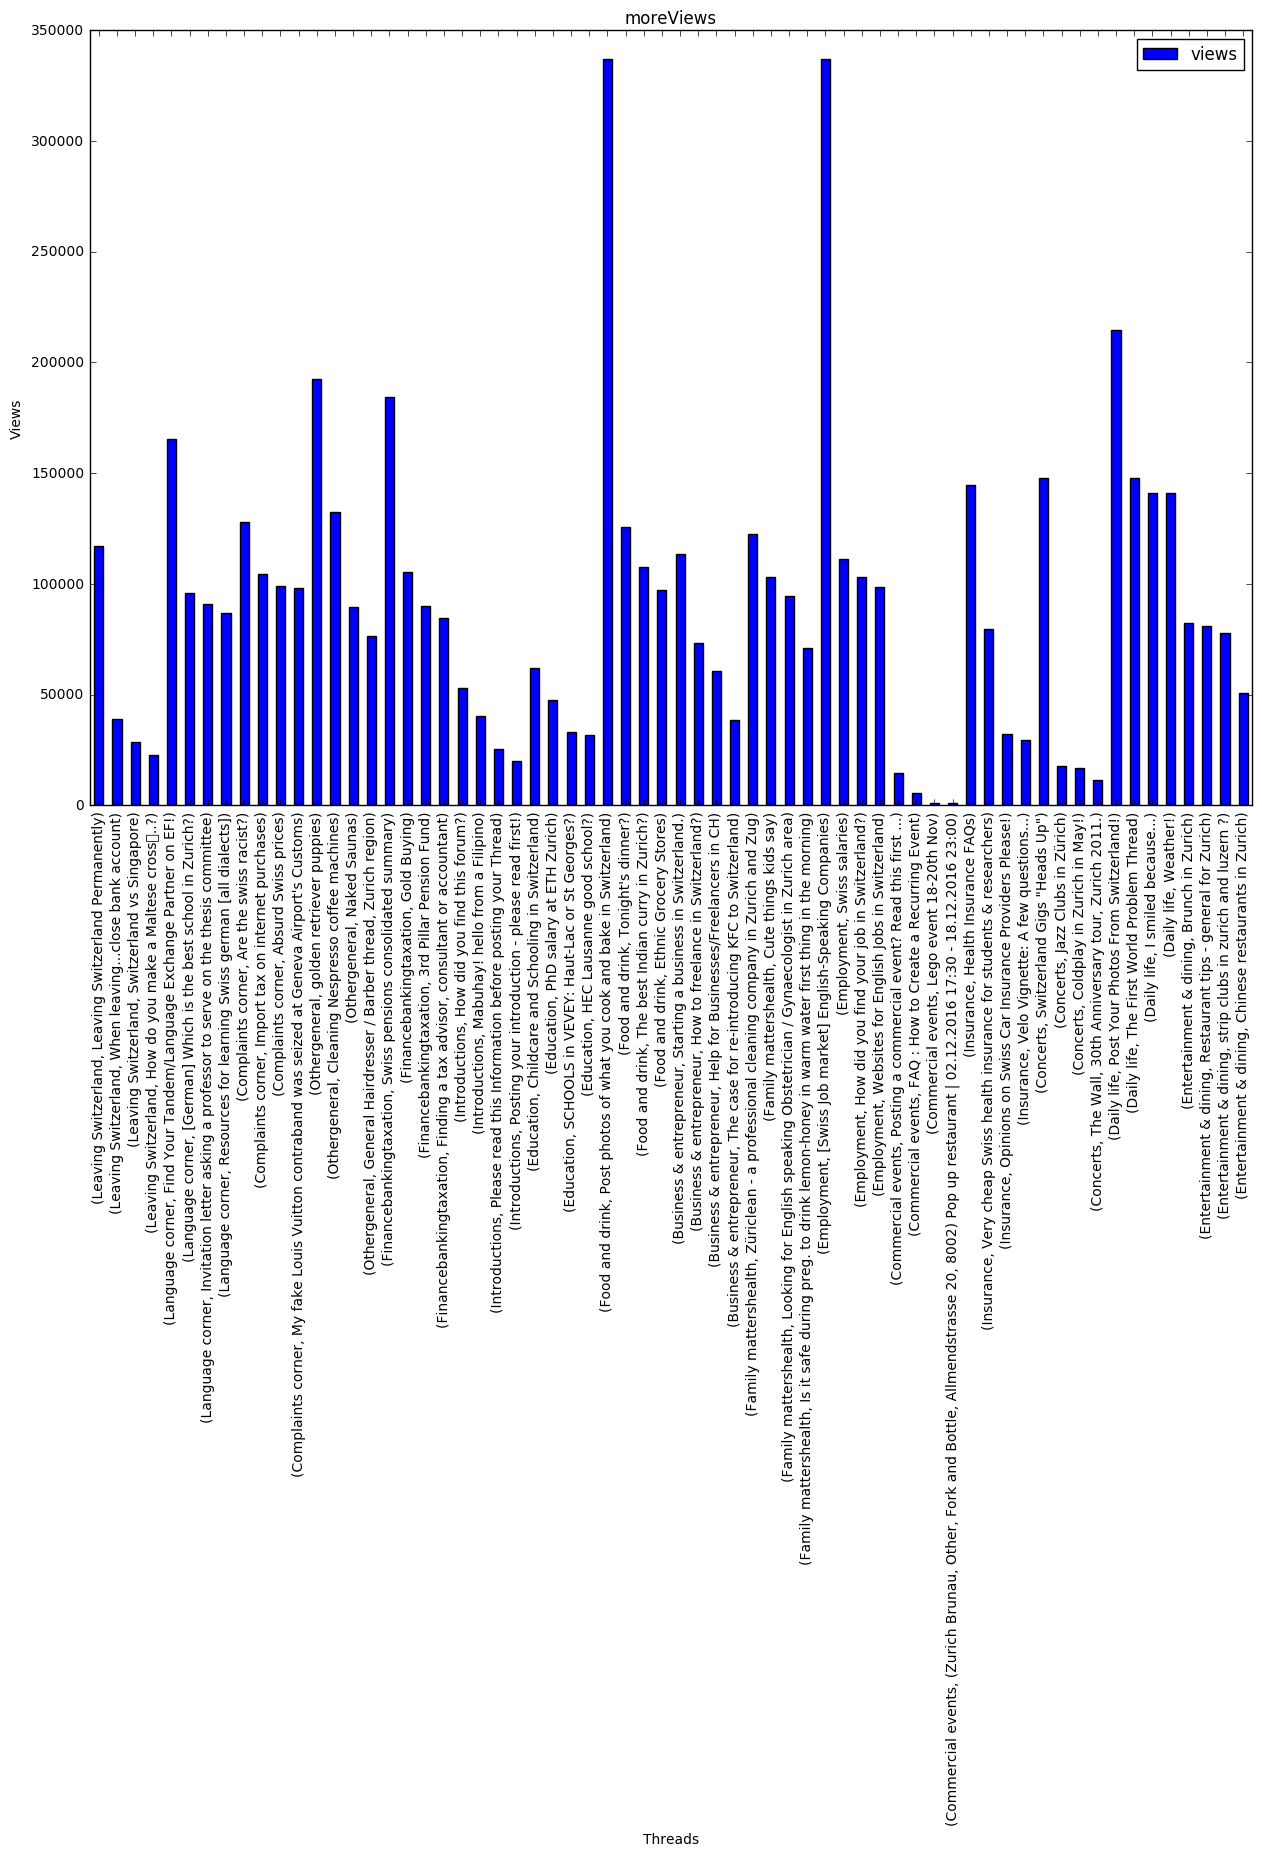

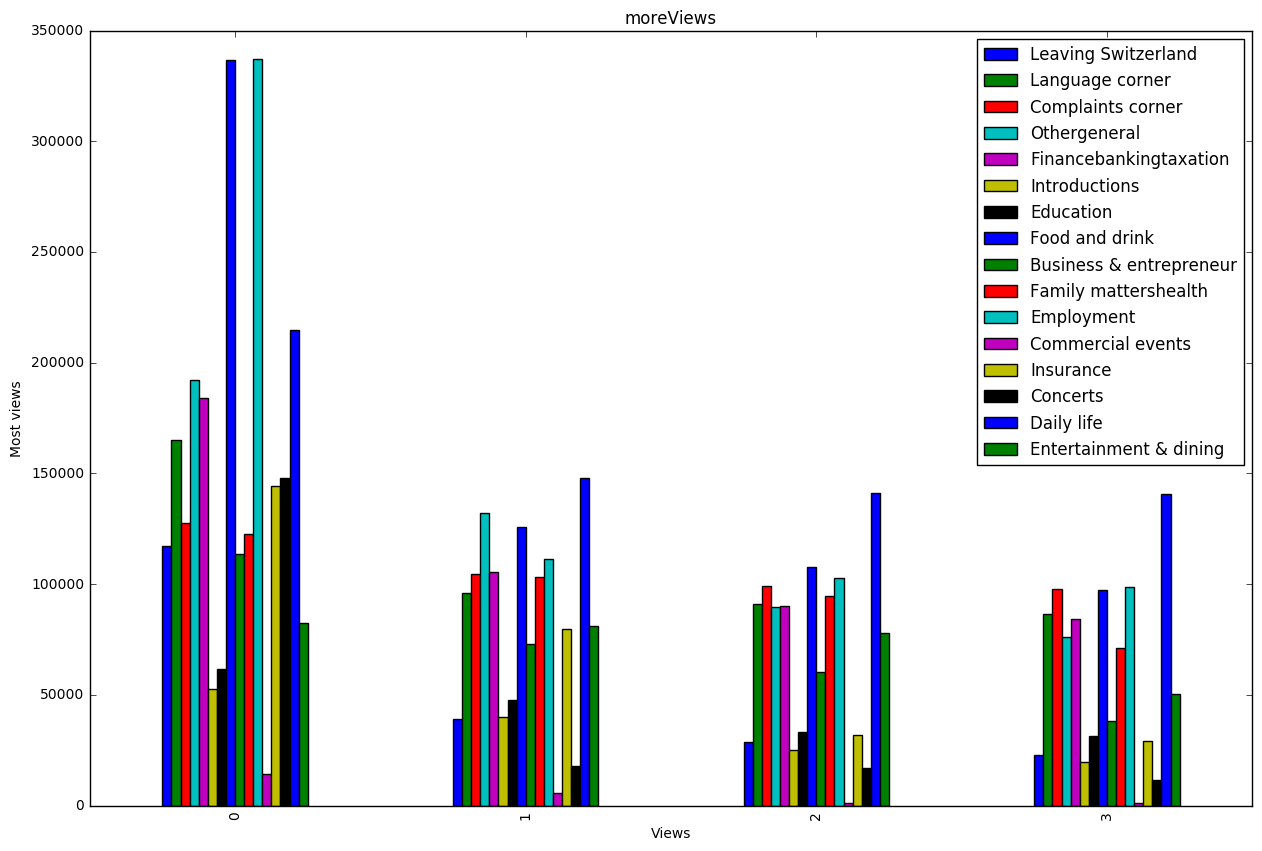

views
index2                  threads                                                   
Leaving Switzerland     Leaving Switzerland Permanently                     117144
                        When leaving...close bank account                    39045
                        Switzerland vs Singapore                             28713
                        How do you make a Maltese cross
..?                  22746
Language corner         Find Your Tandem/Language Exchange Partner on EF!   165236
                        [German] Which is the best school in Zurich?         95817
                        Invitation letter asking a professor to serve o...   91088
                        Resources for learning Swiss german [all dialects]   86619
Complaints corner       Are the swiss racist?                               127714
                        Import tax on internet purchases                    104442
                        Absurd Swiss prices                                  99148
                        My fake Louis Vuitton contraband was seized at ...   98053
Othergeneral            golden retriever puppies                            192340
                        Cleaning Nespresso coffee machines                  132307
                        Naked Saunas                                         89733
                        General Hairdresser / Barber thread, Zurich region   76273
Financebankingtaxation  Swiss pensions consolidated summary                 184224
                        Gold Buying                                         105543
                        3rd Pillar Pension Fund                              89934
                        Finding a tax advisor, consultant or accountant      84466
Introductions           How did you find this forum?                         52843
                        Mabuhay! hello from a Filipino                       40185
                        Please read this Information before posting you...   25248
                        Posting your introduction - please read first!       19805
Education               Childcare and Schooling in Switzerland               61863
                        PhD salary at ETH Zurich                             47754
                        SCHOOLS in VEVEY: Haut-Lac or St Georges?            33054
                        HEC Lausanne good school?                            31597
Food and drink          Post photos of what you cook and bake in Switze...  336871
                        Tonight's dinner?                                   125659
...                                                                            ...
Business & entrepreneur Help for Businesses/Freelancers in CH                60525
                        The case for re-introducing KFC to Switzerland       38327
Family mattershealth    Züriclean - a professional cleaning company in ...  122699
                        Cute things kids say                                103110
                        Looking for English speaking Obstetrician / Gyn...   94713
                        Is it safe during preg. to drink lemon-honey in...   71070
Employment              [Swiss Job market] English-Speaking Companies       337121
                        Swiss salaries                                      111274
                        How did you find your job in Switzerland?           102890
                        Websites for English Jobs in Switzerland             98560
Commercial events       Posting a commercial event? Read this first ...      14473
                        FAQ : How to Create a Recurring Event                 5586
                        Lego event 18-20th Nov                                1241
                        (Zurich Brunau, Other, Fork and Bottle, Allmend...    1051
Insurance               Health Insurance FAQs                               144466
                        Very cheap Swiss health insurance for students ...   79813
          

In [19]:
# temp=dfContainer['Business & entrepreneur'][['threads','views']]
# temp=temp.sort_values('views',ascending=0)
# temp2=temp[:3].append(temp[3:4])
# temp2['index2']='a'
# temp2.index=[temp2.index2,np.arange(4)]
# temp2.drop('index2',1)
# temp3=temp[4:8]
# temp3['index2']='b'
# temp3.index=[temp3.index2,np.arange(4)]
# temp2.append(temp3)
moreViews.plot.bar(figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Threads')
plt.ylabel('Views')
Views.plot(kind='bar',figsize=(15,10))
plt.title('moreViews')
plt.xlabel('Views')
plt.ylabel('Most views')
plt.show()
Views
moreViews

In [18]:
viewsStats

,Commercial events,Language corner,Family mattershealth,Education,Othergeneral,Entertainment & dining,Leaving Switzerland,Insurance,Financebankingtaxation,Daily life,Introductions,Complaints corner,Concerts,Food and drink,Business & entrepreneur,Employment
count,48.000000,3028.000000,7284.000000,1337.000000,8187.000000,1729.000000,1011.000000,1959.000000,5776.000000,11390.000000,13379.000000,3056.000000,849.000000,4248.000000,2117.000000,6206.000000
mean,839.416667,2682.833554,2713.388797,1864.363500,2730.984488,3313.116252,2575.684471,2416.063298,2808.274931,3148.928183,954.654982,4430.026505,1590.957597,3312.927024,2282.867737,2881.488237
std,2152.131628,5792.833416,4086.472894,2991.731303,4930.084400,5277.330614,4708.098245,4407.505635,5025.480927,5914.934703,1060.230704,6729.518466,5188.770999,6931.074290,3858.961418,6447.636503
min,170.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,288.500000,928.750000,987.000000,845.000000,940.000000,1145.000000,1088.000000,1122.500000,1044.750000,947.000000,569.000000,1511.500000,901.000000,1174.500000,1045.000000,1048.000000
50%,408.000000,1420.000000,1652.000000,1228.000000,1514.000000,1801.000000,1620.000000,1629.000000,1641.500000,1648.500000,725.000000,2676.000000,1141.000000,2026.000000,1489.000000,1619.500000
75%,537.000000,2533.000000,2999.000000,1881.000000,2777.000000,3395.000000,2614.000000,2572.500000,2884.500000,3307.000000,998.000000,5086.000000,1498.000000,3719.750000,2424.000000,2885.750000
max,14473.000000,165236.000000,122699.000000,61863.000000,192340.000000,82366.000000,117144.000000,144466.000000,184224.000000,214706.000000,52843.000000,127714.000000,147999.000000,336871.000000,113495.000000,337121.000000


In [19]:
repliesStats

,Commercial events,Language corner,Family mattershealth,Education,Othergeneral,Entertainment & dining,Leaving Switzerland,Insurance,Financebankingtaxation,Daily life,Introductions,Complaints corner,Concerts,Food and drink,Business & entrepreneur,Employment
count,48.000000,3028.000000,7284.000000,1337.000000,8187.000000,1729.000000,1011.000000,1959.000000,5776.000000,11390.000000,13379.000000,3056.000000,849.000000,4248.000000,2117.000000,6206.000000
mean,2.104167,10.430978,14.832098,9.133134,10.842311,10.812608,11.321464,10.202654,11.777181,23.040825,6.495926,48.819699,5.167256,19.336158,9.912612,11.862391
std,4.501723,24.720095,31.402315,15.914637,21.558548,21.565003,21.088839,17.112297,27.032577,58.916850,10.292168,88.862434,38.618787,58.173421,24.554912,19.089089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,11.000000,0.000000,4.000000,2.000000,2.000000
50%,0.000000,4.000000,6.000000,4.000000,5.000000,4.000000,5.000000,6.000000,6.000000,9.000000,4.000000,26.000000,1.000000,9.000000,5.000000,6.000000
75%,2.000000,11.000000,15.000000,10.000000,12.000000,11.000000,12.000000,12.000000,13.000000,24.000000,8.000000,57.000000,4.000000,22.000000,11.000000,14.000000
max,22.000000,747.000000,1016.000000,280.000000,632.000000,320.000000,249.000000,403.000000,1126.000000,2607.000000,462.000000,2000.000000,1100.000000,2766.000000,770.000000,453.000000


# Obj Saver
This will be excluded from GitHub beacuse of the objs sizes.

In [20]:
def save_obj(obj, name ):
    with open('obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

## WordCloud

In [22]:
from wordcloud import WordCloud, STOPWORDS
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop = set(stopwords.words('english'))
stop.update([".",",","?",")","(",":","/","!","%","-",""])
stop.update(STOPWORDS)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
wnl = WordNetLemmatizer()
forumTextContainer={}
i=0
for key in dfContainer:
    temp=dfContainer[key]
    lista=[]
    print(i)
    print("There are %s null values" %temp.isnull().values.sum())
    temp=temp.dropna()
    for thread in (temp.values):
        allwords=[]
#         if not type(thread[1])==float: # moved thread or privated
        text_tk = nltk.word_tokenize(thread[1]) 
        word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
        for wt in word_tag_fd:
            if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ'):
                allwords.append(wnl.lemmatize(wt[0]))
            elif (wt[0] not in stop) and (wt[1] == 'VERB'):
                allwords.append(wnl.lemmatize(wt[0],'v'))
                        
#         allwords=[wnl.lemmatize(wt[0]) for wt in word_tag_fd if  (wt[0] not in stop) and (wt[1] == 'NOUN' or wt[1] == 'ADJ')]
          
    #         allnoun=[wt[0] for wt in word_tag_fd if (wt[1] == 'NOUN' and wt[0] not in stop)] 
    #         # We want to do a wordcloud just of the nouns
    #         allverb=[wt[0] for wt in word_tag_fd if (wt[1] == 'VERB'and wt[0] not in stop)]
        lista.append((thread[3],allwords))
           
    forumTextContainer[key]=(lista)
    i+=1
# print(temp.loc[2].threads)
# word_c=WordCloud()
# wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allnoun).str.cat(sep=' '))
# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()
save_obj(forumTextContainer, 'forumTextContainer') 



0
There are 21 null values
1
There are 0 null values
2
There are 4 null values
3
There are 1 null values


KeyboardInterrupt: 

## Loading TK

In [30]:
# Loading threads tk
forumTextContainer=load_obj('forumTextContainer')

In [ ]:
# forumTextContainer['Education'][0]
from collections import defaultdict
from nltk.probability import ConditionalFreqDist
from gensim import corpora, models, similarities
from gensim.models import  ldamodel
frequency = defaultdict(int)
# Counting the freq of the words in a topic. (stopwords already done)
print(forumTextContainer.keys())
for thread in forumTextContainer['Housing in general']:
    for token in thread[1]:
        if len(token)>3:
            frequency[token] += 1


# [(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
words=[(k, frequency[k]) for k in sorted(frequency, key=frequency.get, reverse=True)]
word_c=WordCloud()
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



## Topic modeling for threads

In [ ]:
pp=pprint.PrettyPrinter(compact=1)
frequency = defaultdict(int)
# Here, we will count the frequency of the words in all the topic
for thread in forumTextContainer['Education']:
    for token in thread[1]:
        if len(token)>3:
            frequency[token] += 1
# Now, we will remove words that have a small value of freq compared with the length of the thread.
# We also organize our tokens in a list per thread
texts = [[token for token in threads[1] if frequency[token]> math.ceil(len(threads[1])/15)] # The really huge topics are reduced
         for threads in forumTextContainer['Education']]

dictionary = corpora.Dictionary(texts)
print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus, normalize=True)
corpus_tfidf = tfidf[corpus]
print("Number of threads: %d"%len(corpus))

In [ ]:
lsi = models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=10)

topics=[" ".join(re.findall("\"[a-z]+\"",topic[1])) for topic in lsi.print_topics(10,20)]
[(print("topic %d: %s \n" %(i,topic)) ) for (i,topic) in enumerate(topics)]

## Searching Queries
We will use the lsi Vector Space Model algorithms because performs better than Tf-Idf and works enough fast.

In [ ]:
new_doc = "Study at the university EPFL in Lausanne with master thesis"
new_vec = dictionary.doc2bow(new_doc.lower().split())
# # index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
# index = similarities.Similarity('/tmp/tst', corpus, num_features=12)
vec_lsi = lsi[new_vec] # convert the query to LSI space
index = similarities.MatrixSimilarity(lsi[corpus]) # transform corpus to LSI space and index it
sims = index[vec_lsi] # perform a similarity query against the corpus
sims = sorted(enumerate(sims), key=lambda item: -item[1])
[(print("Thread: %s --> %s \n" %(forumTextContainer['Education'][search[0]][0],search)) ) for search in sims[:10]]

In [ ]:
text_tk = nltk.word_tokenize(strForum) 
word_tag_fd = nltk.pos_tag(text_tk,tagset='universal') # for simplifying the task, we will une the universal tagset
allwords=[wt[0] for wt in word_tag_fd if  wt[0] not in stop]
word_c=WordCloud()
wordcloud = WordCloud(max_font_size=40,stopwords=stop).generate(pd.Series(allwords).str.cat(sep=' '))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# def comments(thread):
#     # Scrape the HTML at the url
#     response = requests.get(thread,headers={'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'})
#     # Turn the HTML into a Beautiful Soup object
#     soup = BeautifulSoup(response.text, 'lxml')
#     comments={}
#     for link in soup.find_all("div",{"align":"center"}):
#         for link2 in link.find_all("div",{"align":"left"}):
#             for link3 in link2.find_all("tr"):
#                 for link4 in link3.find_all("td",{"width":"99%"}):
#                     for link5 in link4.find_all("div"):
#                         if('id' in link5.attrs and link5['id'].startswith('post_message')):
# #                             print(link5.attrs,link5.contents[0])
#                             contents=''
#                             for content in link5.contents:
#                                 if type(content) is not Tag:
#                                     contents+=' '+content
#                             comments[link5['id']]=contents
# #     print(comments)
#     return ''.join(comments.values())
# comments('http://www.englishforum.ch/education/263961-need-your-help.html')
# findAllPostPages('http://www.englishforum.ch/social-events/25899-poker-thread.html')
# findAllPostPages('http://www.englishforum.ch/education/263961-need-your-help.html')


## Join DF to save

In [17]:
# # Next 'if' is for them to have the same order.
# import copy
# dfjoin=copy.deepcopy(dfContainer)
# for index,key in enumerate(dfjoin):
#     if(sum(dfjoin[key]['threads']==dfAuthors[key+"Authors"]['thread'])==len(dfjoin[key]['threads'])):
# # We cant merge them with thread as the index because is not unique.
# #     result = pd.concat([dfContainer['Employment'], dfAuthors['EmploymentAuthors']], axis=1, join_axes=[dfContainer['Employment'].index])        
#         temp=dfAuthors[key+'Authors'].drop('thread',1)
#         dfjoin[key]['authors']=[list(temp.values[index]) for index,row in enumerate(temp.date)]
#         print(index)
#     else:
#         print("Length of df don't match at: ",index)
# dfjoin[key].head()
# def joinDF():
# dfAuthors[dfAuthors.keys()][0]
#     for i in dfAuthors:
#         dfJoin.
dfJoin=pd.DataFrame()
for index,df in enumerate(dfAuthors):
    dfJoin=dfJoin.append(dfAuthors[df],ignore_index=True)
# dfJoin['topic']=''
suma=0
for key in dfContainer:
    suma+=len(dfContainer[key])
print('dfJoin vs dfContainer\nlen dataframes',suma,len(dfJoin))
print('3 removed from Lugano')
# dfContainer[list(dfContainer.keys())[0]].loc[0]['threads'] in dfJoin.loc[0]['thread']
# for topic in dfContainer:
# dfJoin['thread']
# for i in dfContainer[list(dfContainer.keys())[0]].iterrows():
#     print(i)
# topicToAdd=[]
# for indexJoin,rowJoin in dfJoin.iterrows():
# #     print(indexJoin,rowJoin)
#     for topic in dfContainer:
#         if(indexJoin>len(topicToAdd)-1 and dfContainer[topic][dfContainer[topic]['threads']== rowJoin['thread']].index.size>0):
#             topicToAdd.append(topic)
#         for indexCont,rowCont in dfContainer[topic].iterrows():
#     #         print(i['thread'])
# #             print(element,i['thread'],element in i['threa'])
#             if(rowJoin['thread'] in rowCont['threads']):
#                 rowJoin['join']=topic
# #                 print(topic)
print('len topics',len(dfJoin['topic'].unique()),len(dfContainer))
#             print('yess')
#             break
# dfContainer[list(dfContainer.keys())[0]]['threads'][0]=='How to legally employ a cleaning lady'
# dfContainer[list(dfContainer.keys())[0]][dfContainer[list(dfContainer.keys())[0]]['threads']== 'How to legally employ a cleaning lady'].index.size
#         print(i in dfContainer[topic]['threads'][:])
# for topic in dfContainer:
#     while(df['thread'])
#     for i in de
#     dfJoin['topic'] = dfJoin['thread'].apply(lambda x: topic if x in dfContainer[topic]['threads'] else x)
# dfJoin['topic'].unique()
#     print(1,topic)
# for thread in dfJoin.values:
#     print(thread)
    #     if(dfContainer[topic]['threads'] in dfJoin['thread']):
#         df
#     dfContainer[topic][dfContainer[topic]['threads']==dfJoin['thread']]
#     print(2,thread)
#         if(thread['thread'] in dfContainer[topic]['threads']):
#             dfJoin['topic']=topic
# dfContainer[list(dfContainer.keys())[0]]['threads']
# dfJoin['topic'].unique()
# suma=0
# for key in dfContainer:
#     suma+=len(dfContainer[key])
# print(suma)
# len(dfJoin)
# dfJoin

dfJoin vs dfContainer
len dataframes 71604 71601
3 removed from Lugano
len topics 16 16


In [18]:
print(len(dfJoin),len(dfJoin.values))
# dfJoin
dfJoin

71601 71601


,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
0,Commercial events,FAQ : How to Create a Recurring Event,mirfield,5586,0,Basel,2013-02-07 10:12:00,,8241,2007-04-01 00:00:00,Moddy McModface,"[52, 46]","[8, 180, 2, 984]",6
1,Commercial events,Posting a commercial event? Read this first ...,Nanda,14473,8,Zurich,2007-06-03 15:19:00,\r\n\t\t\t\r\n\t\t\tHere are the guidelines f...,813,2005-05-01 00:00:00,Forum Veteran,"[2, 1]","[168, 114]",3
2,Commercial events,"(Zürich, Other, Viewfinder Center, 350) Digita...",Katya,626,2,Zurich,2016-11-15 21:35:00,\r\n\t\t\t\r\n\t\t\tHello \r\nInterested to e...,10,2008-07-01 00:00:00,Newbie 1st class,"[0, 0]","[2, 2]",0
3,Commercial events,"(GENEVA, Concert/Show, Thtre du Leman, Quai de...",null,258,0,null,0001-01-01 00:00:00,null,,0001-06-01 00:00:00,null,[],[],NaN
4,Commercial events,"(BASEL, Concert/Show, Rhypark, Mülhauserstrass...",null,170,0,null,0001-01-01 00:00:00,null,,0001-06-01 00:00:00,null,[],[],NaN
5,Commercial events,"(ZURICH, Concert/Show, Volkshaus, Stauffachers...",null,202,0,null,0001-01-01 00:00:00,null,,0001-06-01 00:00:00,null,[],[],NaN
6,Commercial events,"(BASEL, Concert/Show, Alte Markthalle, 4051 Ba...",null,215,0,null,0001-01-01 00:00:00,null,,0001-06-01 00:00:00,null,[],[],NaN
7,Commercial events,"(ZURICH, Concert/Show, Mscotte, Theaterstr. 10...",null,259,0,null,0001-01-01 00:00:00,null,,0001-06-01 00:00:00,null,[],[],NaN
8,Commercial events,"(GENEVA, Concert/Show, Uptown Geneva 2 Rue de ...",null,227,0,null,0001-01-01 00:00:00,null,,0001-06-01 00:00:00,null,[],[],NaN
9,Commercial events,"(Landesmuseum, Other, Museumstrasse 2, Zurich,...",KevinDK,269,1,Fribourg,2016-12-19 12:26:00,\r\n\t\t\t\r\n\t\t\tWas there in the weekend ...,82,2015-12-01 00:00:00,Junior Member,"[4, 1]","[39, 24]",0


## Working with data

In [ ]:
# dfJoinCon=pd.DataFrame()
# for key in dfContainer:
#     dfJoinCon.append(pd.concat([dfContainer[key],dfAuthors[key+'Authors']],1))

# # # dfJoinCon.head()
# # viewsxuser=dfJoinCon.groupby(['user'])['views'].sum()
# # viewsxuser=viewsxuser.sort_values(ascending=0)
# # print(viewsxuser[:10])

# # dfJoinCon=pd.concat([dfJoinCon,pd.concat([dfContainer[key],dfAuthors[key+'Authors']],1)])
# len(dfJoinCon.append(pd.concat([dfContainer[key],dfAuthors[key+'Authors']],1)))

In [19]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import sklearn as sklearn
# km = KMeans(n_clusters=4, random_state=1)
# new = dfJoin._get_numeric_data().dropna(axis=1)
# km.fit(new)
# predict=km.predict(new)
# predict
topicValues={}
for index,i in enumerate(sorted(dfJoin['topic'].unique())):
    topicValues[i]=index
topicValues
dfJoinShuffle=shuffle(dfJoin)
dfJoinShuffle['topic']=dfJoinShuffle['topic'].apply(lambda x: topicValues[x])
users_values=dfJoinShuffle['user'].value_counts()
for user in users_values.keys():
    if(users_values[user]>1 and len(dfJoinShuffle[dfJoinShuffle['user']==user])>1):
        oldest=dfJoinShuffle[dfJoinShuffle['user']==user]['date'].min()
        dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[(dfJoinShuffle['user']==user) & (dfJoinShuffle[dfJoinShuffle['user']==user]['date']!=oldest)].index)
#         dfJoinShuffle[dfJoinShuffle['user']==user]['date']=
dfJoinShuffle['user'].value_counts()
# print(dfJoinShuffle[dfJoinShuffle['user']==list(users_values.keys())[0]],'user:',list(users_values.keys())[0],users_values[list(users_values.keys())[3]])
# print(users_values,
# print(list(users_values.keys())[0])
# expectedPrediction=dfJoinShuffle['topic']
# dfJoinShuffle.drop('topic',axis=1,inplace=True)
# totalRows=len(dfJoinShuffle)
# dfToPredict=dfJoinShuffle.iloc[1+(int)(totalRows*0.8):]
# dfJoinShuffle=dfJoinShuffle.iloc[:(int)(totalRows*0.8)]
# Convert DataFrame to matrix
# dfJoinShuffle
# matrix=dfJoinShuffle.as_matrix()
# Using sklearn
# km = sklearn.cluster.KMeans(n_clusters=5)
# km.fit(matrix)
# Get cluster assignment labels
# labels = km.labels_
# Format results as a DataFrame
# results = pandas.DataFrame([dataset.index,labels]).T
# results

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


guest              3275
null                 93
joeyandmum           10
apartmentneeded       5
Oz12                  5
fundoovish            5
Miguel Nero           3
San Diego             3
laurence              3
Sarahzuri19           3
MichaelN              2
Turtledove23          2
SwissGirl2            2
Rig                   2
dathrilla             2
angelaOC              2
thiago.barcala        2
VIE_ZRH               2
Altmanchester         2
philo                 2
muddy7                2
bearbadger            2
Accerris              2
wheels                2
Crutcheeees           2
borashee              2
JaffaCakes            2
PaulJarvis            2
Bibi                  2
LostInTheFlood        2
                   ... 
Krisztina             1
amit711               1
Spanish Mustang       1
dinoliew              1
Toppie                1
chelf                 1
ciren76               1
t0mb                  1
shch                  1
fountainhead          1
Kristina200     

In [25]:
dfJoinShuffle=dfJoinShuffle.drop(dfJoinShuffle[dfJoinShuffle['user']=='guest'].index)
users=dfJoinShuffle['user'].value_counts()
duplicates=[]
for index,user in enumerate(users.keys()):
    if(users[index]>1):
        duplicates.append(user)
for user in duplicates:
    duplicated=dfJoinShuffle[dfJoinShuffle['user']==user]
#     print(len(duplicated),duplicated.index[1:])
    dfJoinShuffle=dfJoinShuffle.drop(duplicated.index[1:])
# dfJoinShuffle['user'].value_counts()

,topic,thread,user,views,replies,location,date,post,user_posts,since,exp,thanked,groaned,reputation
41329,9,Michele Bachmann,runningdeer,0,0,la cote,2012-05-09 10:19:00,Geographical for sure. Switzerland has be...,2779,2009-10-01 00:00:00,Forum Legend,"[15, 9]","[2, 155, 1, 221]",6


In [57]:
from sklearn import preprocessing

expectedPrediction=dfJoinShuffle['topic']
dfJoinShuffle_aux=dfJoinShuffle.drop(['thread','post','user','exp','reputation','groaned','thanked','user_posts','views','replies','since'],axis=1)
dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
min_max_scaler = preprocessing.MinMaxScaler()
# for column in dfJoinShuffle_aux:
#     dfJoinShuffle_aux[column]=np_scaled = min_max_scaler.fit_transform(df)
locationsProc = preprocessing.LabelEncoder()
dfJoinShuffle_aux.location = locationsProc.fit_transform(dfJoinShuffle_aux.location)
scaled_values = min_max_scaler.fit_transform(dfJoinShuffle_aux.values)
# print(scaled_values)
# dfJoinShuffle_aux.columns
for index,column in enumerate(dfJoinShuffle_aux):
    dfJoinShuffle_aux[column]=pd.DataFrame(scaled_values)[index]
dfJoinShuffle_aux=dfJoinShuffle_aux.dropna()
# =pd.DataFrame(scaled_values)[0]
dfJoinShuffle_aux['topic']

/opt/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


9144     0.800000
6377     0.266667
20026    0.800000
9554     0.866667
15523    0.800000
9819     0.800000
17075    0.466667
14611    0.266667
18668    0.800000
25066    0.800000
5395     0.533333
7307     0.266667
12928    0.800000
1785     0.800000
22736    0.733333
14355    0.800000
14728    0.800000
24638    0.800000
3331     0.800000
6556     0.400000
4194     0.400000
17586    0.533333
3569     0.666667
11261    0.800000
1398     0.800000
13077    0.800000
13070    0.400000
16122    0.733333
11497    0.800000
7340     0.800000
           ...   
523      0.266667
2608     0.800000
14696    0.800000
13577    0.800000
4176     0.400000
2759     0.800000
9408     0.266667
1167     0.400000
19207    0.800000
3020     0.400000
3043     0.800000
9704     0.800000
5256     0.800000
6843     0.800000
14450    0.800000
11272    1.000000
2183     0.800000
17993    0.333333
5031     0.866667
14565    0.266667
12282    0.800000
25200    0.800000
2190     0.266667
2747     0.800000
17487    0

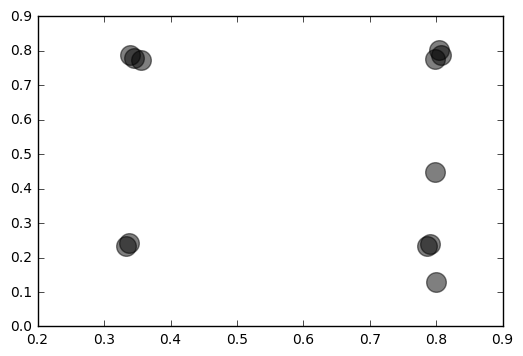

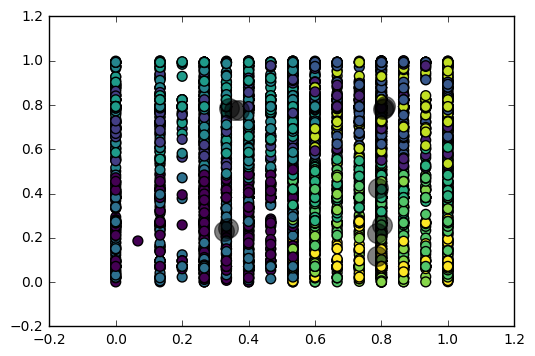

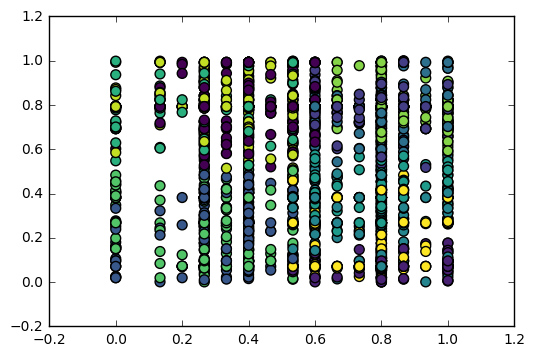

3052 3052


,topic,location,date,cluster_analysis
4630,0.800000,0.793078,0.818182,2
18107,0.600000,0.029401,0.727273,5
3405,0.800000,0.625047,0.818182,9
10499,0.800000,0.949944,0.363636,4
10126,0.800000,0.233532,0.909091,1
13598,0.400000,0.793078,0.090909,4
8760,1.000000,0.793078,0.545455,11
6206,0.800000,0.409565,0.181818,8
7014,0.800000,0.463342,0.181818,5
9033,0.533333,0.640491,0.909091,0


In [98]:
from sklearn.metrics import pairwise_distances_argmin
expectedPrediction=dfJoinShuffle['topic']
dfToPredict20=dfJoinShuffle_aux.sample(frac=0.2)
dfJoinShuffle_aux80=dfJoinShuffle_aux.loc[~dfJoinShuffle_aux.index.isin(dfToPredict.index)]
matrix80=dfJoinShuffle_aux80.as_matrix()
matrix20=dfToPredict20.as_matrix()
kmeans = KMeans(n_clusters=12)
kmeans.fit(matrix80)
# y_kmeans = kmeans.predict(dfJoinShuffle_aux80.as_matrix())
# plt.scatter(matrixExpected[:, 0], matrixExpected[:, 1], c=y_kmeans, s=50, cmap='viridis')
# plt.show()
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
# method to readjust the cluster centers in order to optimize the minimum distance between centers
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(matrix80, 12)
plt.scatter(matrix80[:, 0], matrix80[:, 1], c=labels,s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
labels = kmeans.fit_predict(matrix20)
plt.scatter(matrix20[:, 0], matrix20[:, 1], c=labels,
            s=50, cmap='viridis');
plt.show()
print(len(kmeans.labels_),len(dfToPredict20))
dfToPredict['cluster_analysis']=kmeans.labels_
dfToPredict

In [54]:
# from sklearn import preprocessing

expectedPrediction=dfJoinShuffle['topic']
# dfJoinShuffle_aux=dfJoinShuffle.drop(['thread','post','user','exp','reputation','groaned','thanked','user_posts','views','replies','since'],axis=1)
# # dfJoinShuffle
# # totalRows=len(dfJoinShuffle_aux)
# print(dfJoinShuffle_aux.columns)
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
# # dfJoinShuffle_aux['since']=dfJoinShuffle_aux['since'].apply(lambda x: '%s'% (x.month))

# dfToPredict=dfJoinShuffle_aux.iloc[1+(int)(totalRows*0.8):]
# dfJoinShuffle_aux=dfJoinShuffle_aux.iloc[:(int)(totalRows*0.8)]
dfToPredict=dfJoinShuffle_aux.sample(frac=0.2)
dfJoinShuffle_aux=dfJoinShuffle_aux.loc[~dfJoinShuffle_aux.index.isin(dfToPredict.index)]
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s'% (x.month))
# dfToPredict['date']=dfToPredict['date'].apply(lambda x: '%s'% (x.month))
# dfToPredict['since']=dfToPredict['since'].apply(lambda x: '%s'% (x.month))

# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: '%s %s %s %s %s'% (x.year, x.month, x.day,x.hour,x.minute))
# print(type(dfJoinShuffle_aux['date'].values[0].minute))
# dfJoinShuffle_aux['date']=dfJoinShuffle_aux['date'].apply(lambda x: str(x.year)+'-'+str(x.month)+'-'+str(x.day)+' '+str(x.hour)+':'+str(x.minute))
locationsProc = preprocessing.LabelEncoder()
# dfJoinShuffle_aux.location = locationsProc.fit_transform(dfJoinShuffle_aux.location)
# dfToPredict.location = locationsProc.fit_transform(dfToPredict.location)

,topic,location,date,Cluster Class
4630,0.800000,0.793078,0.818182,6
18107,0.600000,0.029401,0.727273,9
3405,0.800000,0.625047,0.818182,6
10499,0.800000,0.949944,0.363636,11
10126,0.800000,0.233532,0.909091,9
13598,0.400000,0.793078,0.090909,2
8760,1.000000,0.793078,0.545455,11
6206,0.800000,0.409565,0.181818,5
7014,0.800000,0.463342,0.181818,5
9033,0.533333,0.640491,0.909091,8
